# Exploring the MovieLens Dataset

## Practive Prof-Uploaded Code

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../data/movie_lens_genre_separated.tsv', sep='\t')

In [4]:
#First 5 instances/rows
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [5]:
# Mean ratings for film by gender
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [6]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [7]:
# Aggregate by title feature
ratings_by_title = data.groupby('title').size()

In [8]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            74
'Night Mother (1986)              70
'Til There Was You (1997)        104
'burbs, The (1989)               303
...And Justice for All (1979)    398
dtype: int64

In [9]:
# Aggregated titles with condition
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [10]:
active_titles[:5]

Index([''burbs, The (1989)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)'],
      dtype='object', name='title')

In [11]:
# Mean ratings of aggregated titles with condition
mean_ratings = mean_ratings.loc[active_titles]

In [12]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [13]:
# Mean ratings sorted by top female ratings
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [14]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [15]:
# Mean ratings sorted by top male ratings
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [16]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


In [17]:
# New mean feature (difference in means = most divisive ratings between M and F)
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [18]:
# Mean ratings sorted by greatest diff and preferred by women
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [19]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
That Darn Cat! (1997),3.156250,2.435484,-0.720766
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
"Pagemaster, The (1994)",3.146341,2.510638,-0.635703
Grease (1978),3.975265,3.367041,-0.608224
Herbie Goes Bananas (1980),2.965517,2.373333,-0.592184


In [20]:
# Mean ratings sorted by greatest diff and preferred by men
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Lifeforce (1985),2.250000,2.994152,0.744152
Marked for Death (1990),2.100000,2.837607,0.737607
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985


In [21]:
# Format occupations and age groups better
occupation_dict = {
    0: "not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

age_dict = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

In [22]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [23]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


## Homework (my code)

#### An aggregate of the movie ratings for each particular genre.

In [24]:
ratings_by_genre = data.pivot_table('rating', index='genres', aggfunc='mean')
ratings_by_genre

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


#### The top 5 highest ranked genre by occupation.

In [162]:
# Step 1: each occupation's mean ranking for each genre
rank_by_occupation = data.pivot_table('rating', index='genres', columns='occupation', aggfunc='mean')
rank_by_occupation

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011
Crime,3.687085,3.659342,3.678039,3.742811,3.723450,3.696655,3.802857,3.736324,3.575758,3.642346,...,3.652772,3.768506,3.832487,3.734596,3.801012,3.737569,3.713289,3.635569,3.634085,3.651598
Documentary,3.581633,3.984887,4.028933,3.852632,3.962887,3.886598,4.013245,3.915134,3.900000,3.800000,...,3.854545,3.844221,3.970588,3.917763,3.987500,3.933492,4.024129,3.640000,3.727273,3.967914
Drama,3.782167,3.754293,3.732216,3.790601,3.748794,3.739991,3.871756,3.766663,3.627545,3.791185,...,3.743350,3.840207,3.949047,3.788018,3.836070,3.791983,3.800158,3.738553,3.619308,3.653348
Fantasy,3.298039,3.456388,3.424432,3.472675,3.363636,3.431478,3.486842,3.471070,3.407895,3.606357,...,3.426315,3.497192,3.678019,3.600000,3.545362,3.494278,3.528097,3.420833,3.230900,3.338421


In [183]:
# Step 2: Iterate through each column/occupation, printing the 5 largest values/rankings for each 
counter = 0
occ_count = len(list(rank_by_occupation))

while counter < occ_count:
    occ = rank_by_occupation.iloc[:, [counter]]
    occ_sorted = occ.nlargest(5, occ)
    print(occ_sorted)
    counter = counter + 1

occupation  K-12 student
genres                  
Film-Noir       4.212766
War             3.880144
Drama           3.782167
Crime           3.687085
Mystery         3.636612
occupation   academic/educator
genres                        
Film-Noir             4.082613
Documentary           3.984887
War                   3.882950
Drama                 3.754293
Musical               3.701586
occupation     artist
genres               
Film-Noir    4.114000
Documentary  4.028933
War          3.859375
Drama        3.732216
Mystery      3.719645
occupation   clerical/admin
genres                     
Film-Noir          4.075332
War                3.927692
Musical            3.857049
Documentary        3.852632
Animation          3.822104
occupation   college/grad student
genres                           
Film-Noir                4.039548
Documentary              3.962887
War                      3.864107
Drama                    3.748794
Crime                    3.723450
occupation   custome

#### The most popular (with most ratings) movie by age group.

In [191]:
# Step 1: Each age group's rating count for each movie
rating_count_by_ages = data.pivot_table('rating', index='title', columns='age', aggfunc='count')
rating_count_by_ages

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
title,,,,,,,
"$1,000,000 Duck (1971)",12.0,22.0,30.0,2.0,8.0,NaN,NaN
'Night Mother (1986),3.0,26.0,21.0,6.0,9.0,3.0,2.0
'Til There Was You (1997),16.0,48.0,20.0,6.0,4.0,6.0,4.0
"'burbs, The (1989)",90.0,115.0,55.0,11.0,24.0,6.0,2.0
...And Justice for All (1979),14.0,116.0,140.0,40.0,58.0,28.0,2.0
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.0,16.0,9.0,1.0,1.0,NaN,1.0
Zero Effect (1998),120.0,288.0,92.0,34.0,36.0,16.0,16.0
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [262]:
# Step 2: Iterate through each column/age-group, printing the largest values/rank counts for each 
counter = 0
ages_count = len(list(rating_count_by_ages))

while counter < ages_count:
    age_group = rating_count_by_ages.iloc[:, [counter]]
    ages_sorted = age_group.nlargest(1, age_group)
    print(ages_sorted)
    counter += 1

age                                                 18-24
title                                                    
Star Wars: Episode VI - Return of the Jedi (1983)  2930.0
age                                                  25-34
title                                                     
Star Wars: Episode V - The Empire Strikes Back ...  5880.0
age                                                  35-44
title                                                     
Star Wars: Episode V - The Empire Strikes Back ...  2990.0
age                                                  45-49
title                                                     
Star Wars: Episode V - The Empire Strikes Back ...  1130.0
age                                                  50-55
title                                                     
Star Wars: Episode V - The Empire Strikes Back ...  1030.0
age                                                   56+
title                                                    
St

#### A breakdown of a movie’s ratings by occupation, using any movie of your choice.

In [58]:
# Step 1: All movies' rating counts by occupation
ratings_by_occupation = data.pivot_table('rating', index='occupation', columns='title', aggfunc='count')
ratings_by_occupation
# Step 2: Specific movie's rating count by occupation
movie_rating = ratings_by_occupation.loc[:, ["101 Dalmatians (1996)"]]
movie_rating

title,101 Dalmatians (1996)
occupation,
K-12 student,62.0
academic/educator,68.0
artist,36.0
clerical/admin,24.0
college/grad student,84.0
customer service,12.0
doctor/health care,32.0
executive/managerial,84.0
farmer,2.0


#### A function that given a user id, returns: (1) this user’s age and occupation, (2) the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [270]:
def user_info(id):
    # (1)
    age = data.loc[data['user_id'] == id, 'age'].iloc[0]
    occupation = data.loc[data['user_id'] == id, 'occupation'].iloc[0]
    # (2) Step 1: All users' average ratings
    all_average_ratings = data.pivot_table('rating', index='user_id', aggfunc='mean')
    # (2) Step 2: Specific user's average rating
    average_rating = all_average_ratings.loc[id, 'rating']
    # (3) Step 1: All users' rating of all movies
    all_ratings = data.loc[:, ['user_id', 'rating', 'title']]
    # (3) Step 2: Specific user's rating of all movies
    user_ratings = all_ratings.loc[all_ratings['user_id'] == id, ['user_id', 'rating', 'title']]
    # (3) Steps 3-4: Instances when the ratings equal the max and min ratings    
    highest = user_ratings.loc[user_ratings['rating'] == user_ratings['rating'].max(), ['title', 'rating', 'user_id']]
    lowest = user_ratings.loc[user_ratings['rating'] == user_ratings['rating'].min(), ['title', 'rating', 'user_id']]
    # Print (1), (2), and (3)
    print("1) Age and occupation: ")
    print(age + ', ' + occupation)
    print("\n2) Average rating given: ")
    print(average_rating)
    print("\n3) Highest rated movie(s): \n")
    print(highest)
    print("\nand lowest rated movie(s): \n")
    print(lowest)

user_info(6040)

1) Age and occupation: 
25-34, doctor/health care

2) Average rating given: 
3.570480928689884

3) Highest rated movie(s): 

                                                     title  rating  user_id
34271                             Wizard of Oz, The (1939)       5     6040
34272                             Wizard of Oz, The (1939)       5     6040
34273                             Wizard of Oz, The (1939)       5     6040
34274                             Wizard of Oz, The (1939)       5     6040
59200                              Schindler's List (1993)       5     6040
...                                                    ...     ...      ...
2074156                                  After Life (1998)       5     6040
2074916       White Balloon, The (Badkonake Sefid ) (1995)       5     6040
2082280  Return of Martin Guerre, The (Retour de Martin...       5     6040
2089555       Not One Less (Yi ge dou bu neng shao) (1999)       5     6040
2100475                            Appl

#### Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

In [296]:
rating_mean_by_ages = data.pivot_table('rating', index='age', aggfunc='mean')
rating_mean_by_ages

,rating
age,
18-24,3.509613
25-34,3.547199
35-44,3.622463
45-49,3.641898
50-55,3.715984
56+,3.758113
Under 18,3.536093


In [295]:
rating_count_by_ages = data.pivot_table('rating', index='age', aggfunc='count')
rating_count_by_ages

,rating
age,
18-24,391848
25-34,831344
35-44,417543
45-49,173677
50-55,149791
56+,78822
Under 18,58820


Text(0.5, 0, 'age group')

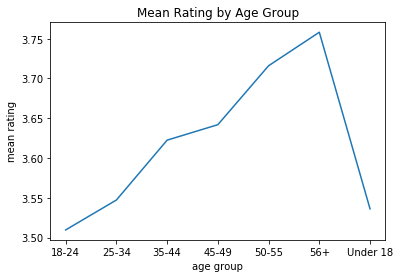

In [288]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(rating_mean_by_ages.index, rating_mean_by_ages.values)
plt.title("Mean Rating by Age Group")
plt.ylabel('mean rating')
plt.xlabel('age group')

Text(0.5, 0, 'age group')

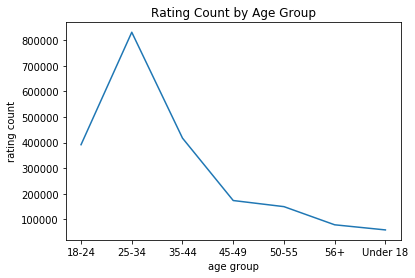

In [289]:
plt.plot(rating_count_by_ages.index, rating_count_by_ages.values)
plt.title("Rating Count by Age Group")
plt.ylabel('rating count')
plt.xlabel('age group')

I was interested to see ranking trends (both quantity and quality) for each age group, so I plotted the count and mean rating for each age group. A couple of interesting observations are the following:

- The huge spike for the 25-34 age group suggests that this age group gives more than twice the number of movies ratings as the next hightst ranked age groups. We can't infer that they actually watch more, but I wonder if they rate more because of how helpful more recent generations find ratings in this digital age. Older adult age groups give much fewer ratings.
- With a couple of exceptions, it seems that rating scores (first graph) increase as the number of ratings given (second graph) decreases. I wonder if those who give more ratings are more critical because they've either seen better movies or because of their rating experience. Also, sometimes those who don't do or value an activity as much don't put as much thought into the activity.
